### Business Problem :- Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
-------------------------------------------------------------------------------------------------------------------------

### Import libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Import Data 

In [2]:
toyota_data = pd.read_csv("ToyotaCorolla.csv")

In [3]:
toyota_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
toyota_data = toyota_data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [5]:
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyota_data=toyota_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [7]:
toyota_data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
toyota_data.tail()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


### Data Understanding

In [9]:
toyota_data.count()

Price     1436
Age       1436
KM        1436
HP        1436
CC        1436
Doors     1436
Gears     1436
QT        1436
Weight    1436
dtype: int64

In [10]:
toyota_data.nunique()

Price      236
Age         77
KM        1263
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
dtype: int64

In [11]:
toyota_data.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [12]:
toyota_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [13]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
toyota_data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [15]:
toyota_data.shape

(1436, 9)

### Understanding the target variable 

In [16]:
toyota_data['Price'].unique()

array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        8950,  9250,

### Data Visualization of Target Variable : 

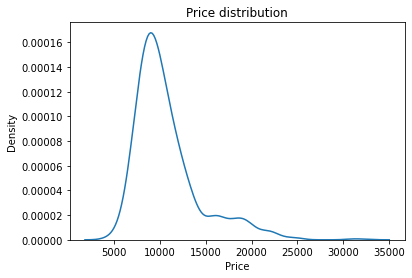

In [17]:
sns.distplot(toyota_data['Price'], bins=5,kde=True, hist = False)
plt.title('Price distribution')
plt.show()

### From the above distplot we can say that the average price (which is 10k) is the most frequent
------------------------------------------------------------------------------------------------------------
### The target variable is right skewed (postivel skewness).
------------------------------------------------------------------------------------------------------------

### Assumptions Check :
----------------------------
### 1) Normality Test :

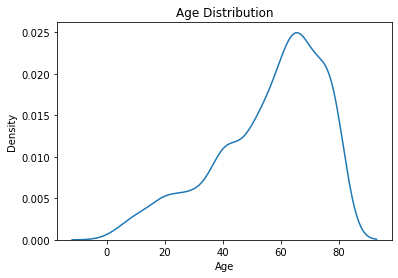

In [18]:
sns.distplot(toyota_data['Age'],bins=5,kde=True,hist=False)
plt.title('Age Distribution')
plt.show()

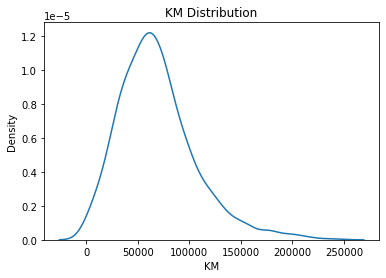

In [19]:
sns.distplot(toyota_data['KM'],bins=5,kde=True,hist=False)
plt.title('KM Distribution')
plt.show()

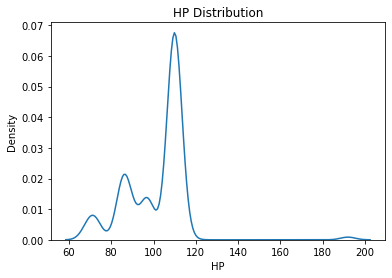

In [20]:
sns.distplot(toyota_data['HP'],bins=5,kde=True,hist=False)
plt.title('HP Distribution')
plt.show()

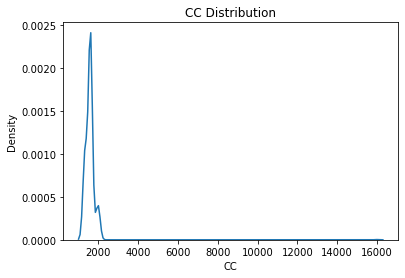

In [21]:
sns.distplot(toyota_data['CC'],bins=5,kde=True,hist=False)
plt.title('CC Distribution')
plt.show()

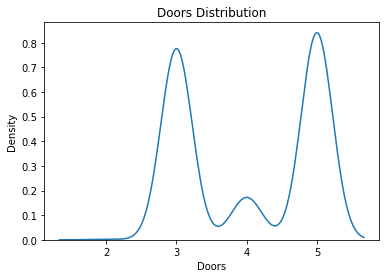

In [22]:
sns.distplot(toyota_data['Doors'],bins=5,kde=True,hist=False)
plt.title('Doors Distribution')
plt.show()

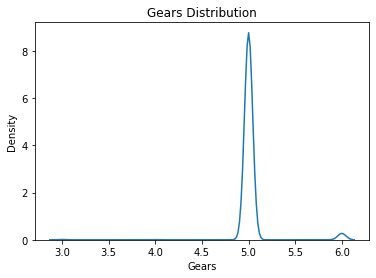

In [23]:
sns.distplot(toyota_data['Gears'],bins=5,kde=True,hist=False)
plt.title('Gears Distribution')
plt.show()

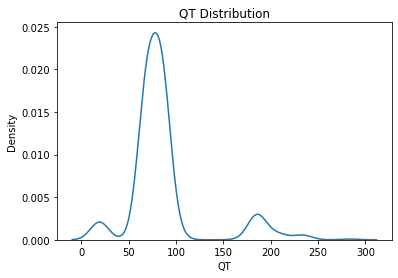

In [24]:
sns.distplot(toyota_data['QT'],bins=5,kde=True,hist=False)
plt.title('QT Distribution')
plt.show()

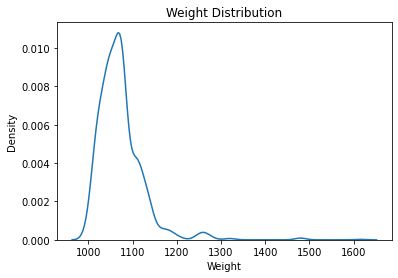

In [25]:
sns.distplot(toyota_data['Weight'],bins=5,kde=True,hist=False)
plt.title('Weight Distribution')
plt.show()

### The normality test is failed. 

---------------------------------------

### 2. Linearity Test : 

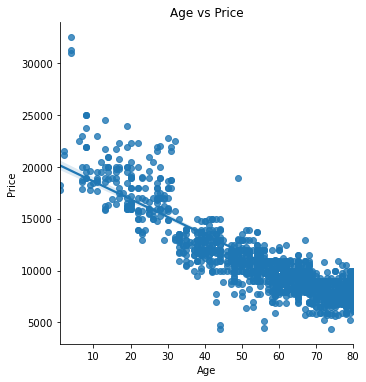

In [26]:
sns.lmplot(x='Age',y='Price',data=toyota_data)
plt.title('Age vs Price')
plt.show()

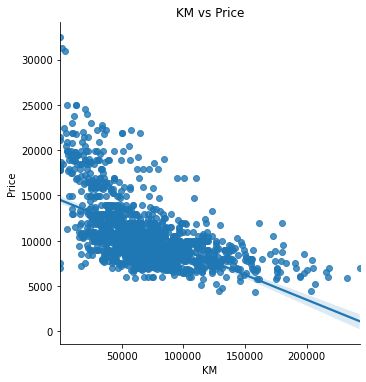

In [27]:
sns.lmplot(x='KM',y='Price',data=toyota_data)
plt.title('KM vs Price')
plt.show()

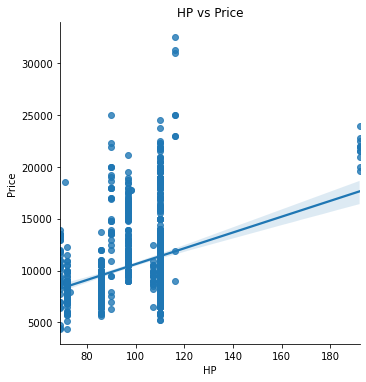

In [28]:
sns.lmplot(x='HP',y='Price',data=toyota_data)
plt.title('HP vs Price')
plt.show()

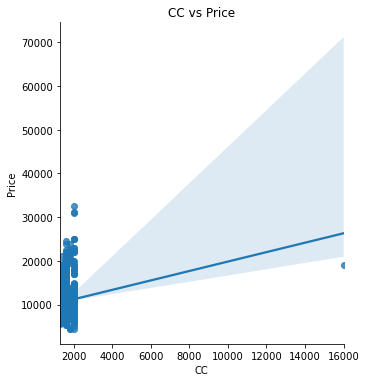

In [29]:
sns.lmplot(x='CC',y='Price',data=toyota_data)
plt.title('CC vs Price')
plt.show()

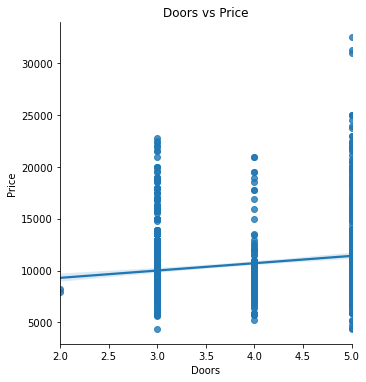

In [30]:
sns.lmplot(x='Doors',y='Price',data=toyota_data)
plt.title('Doors vs Price')
plt.show()

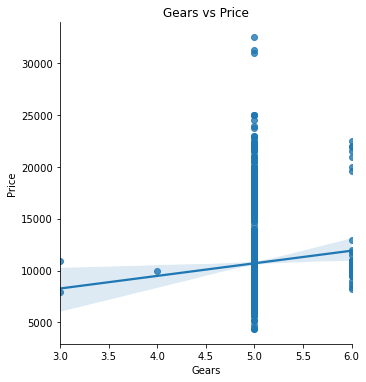

In [31]:
sns.lmplot(x='Gears',y='Price',data=toyota_data)
plt.title('Gears vs Price')
plt.show()

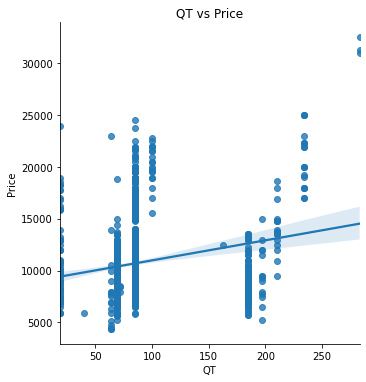

In [32]:
sns.lmplot(x='QT',y='Price',data=toyota_data)
plt.title('QT vs Price')
plt.show()

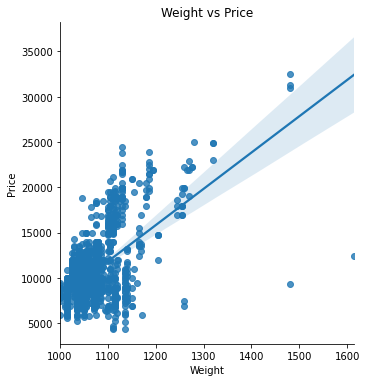

In [33]:
sns.lmplot(x='Weight',y='Price',data=toyota_data)
plt.title('Weight vs Price')
plt.show()

### Linearity Test is failed here
-----------------------------------------------

### 3) No Auto Regression Test - Passed (as there is no date-time feature)
----------------------------------------------------------------------------------

### 4) No Multicollinearity Test :

In [34]:
corr = toyota_data.corr()
corr

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


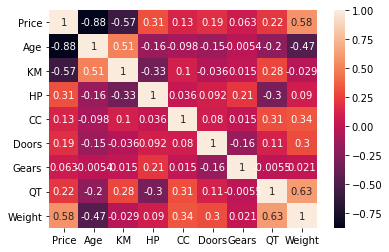

In [35]:
sns.heatmap(data = corr, annot = True)
plt.show()

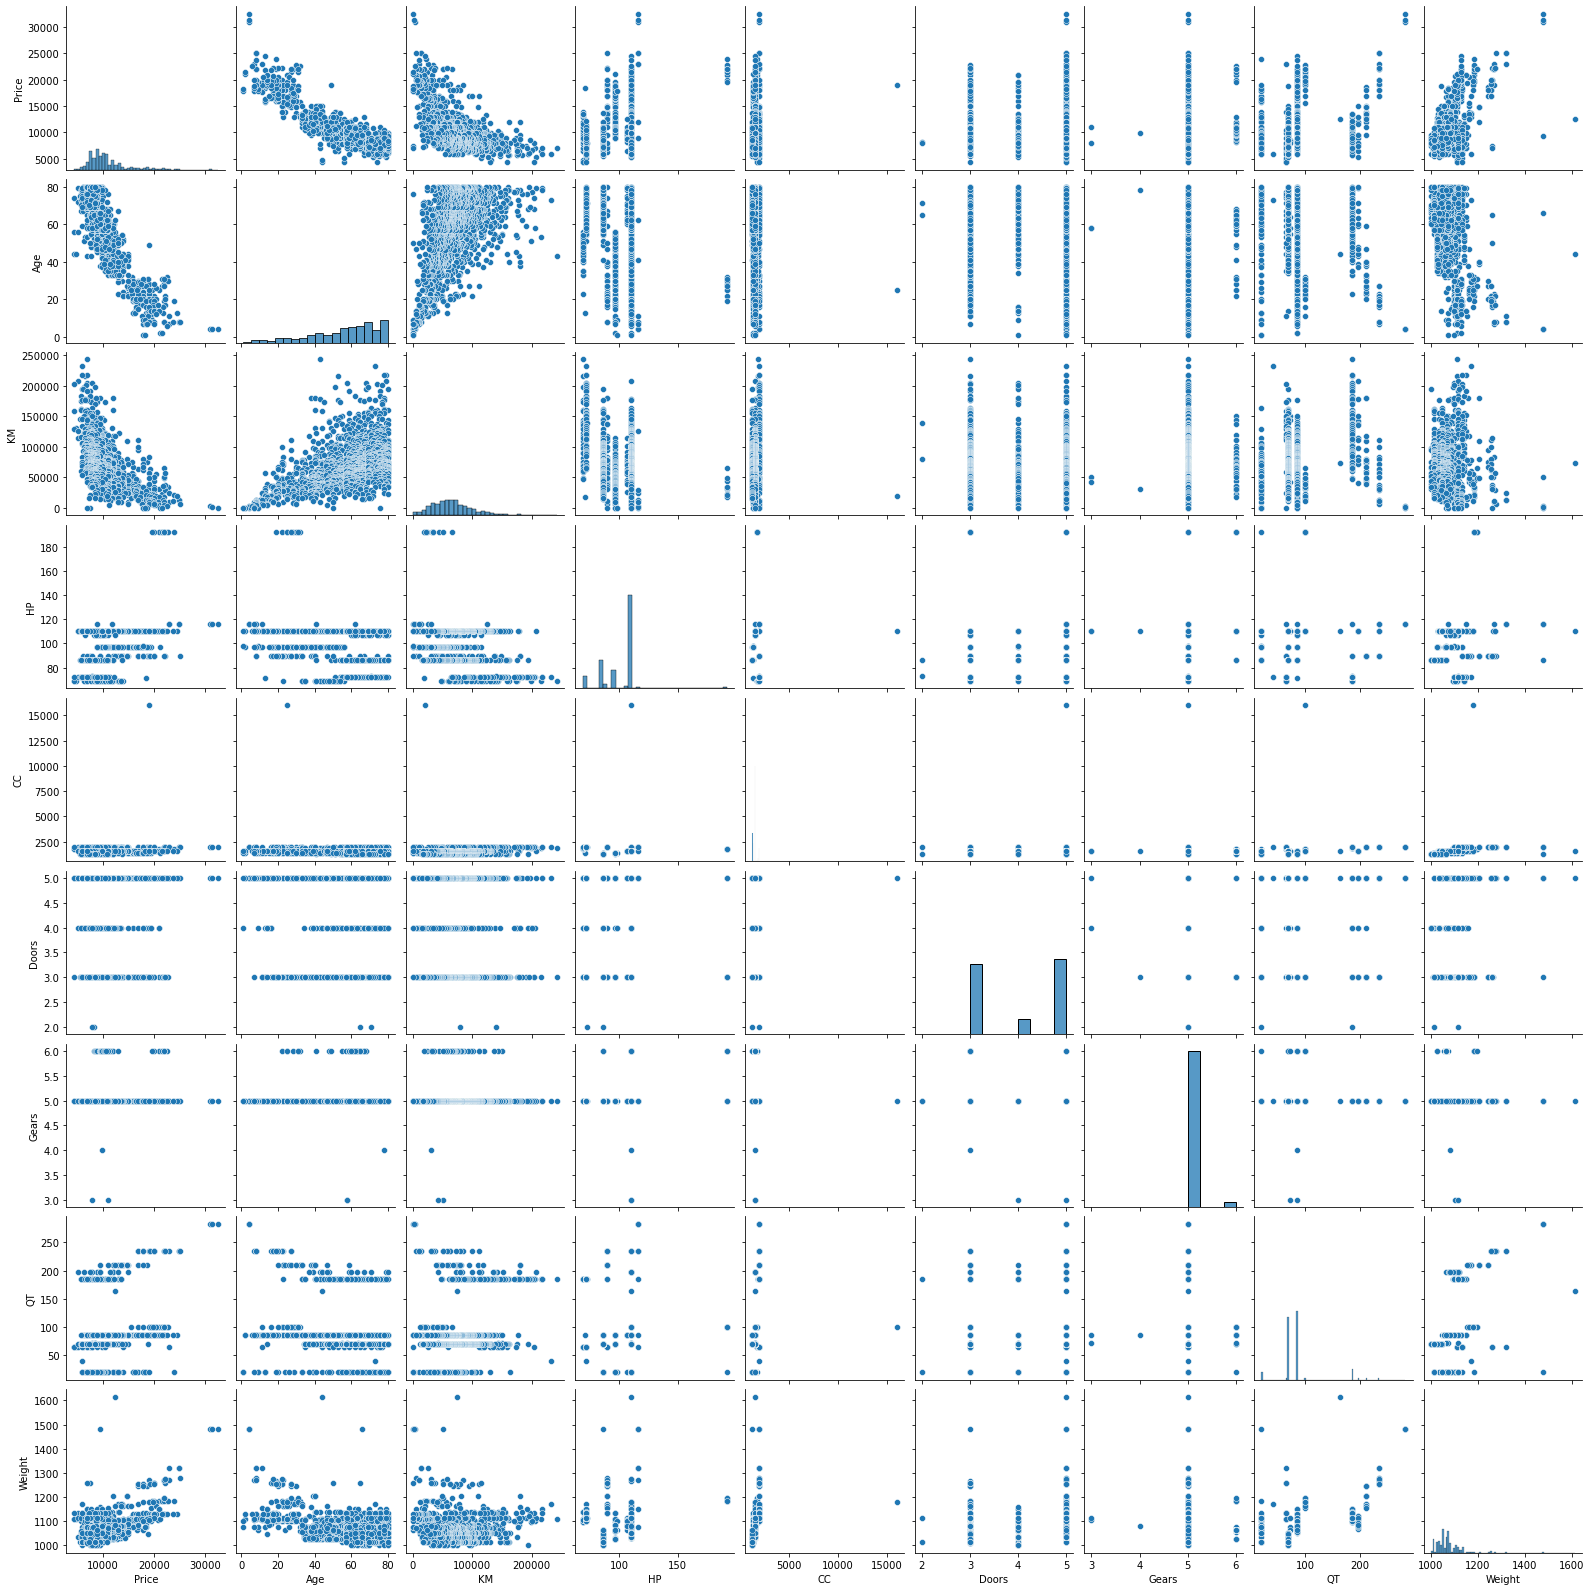

In [36]:
sns.pairplot(toyota_data)
plt.show()

### Model Building using Statsmodels ( OLS )

In [37]:
ols_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_data).fit()

In [38]:
ols_model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [39]:
print('P values of the model:\n ',round(ols_model.pvalues,2))

P values of the model:
  Intercept    0.00
Age          0.00
KM           0.00
HP           0.00
CC           0.18
Doors        0.97
Gears        0.00
QT           0.00
Weight       0.00
dtype: float64


In [40]:
print("rsquared value is      : ",round(ols_model.rsquared,2))
print("rsquared_adj values is : ",round(ols_model.rsquared_adj,2))
print('AIC Value              : ',round(ols_model.aic,2))
print('BIC Value              : ',round(ols_model.bic,2))

rsquared value is      :  0.86
rsquared_adj values is :  0.86
AIC Value              :  24769.08
BIC Value              :  24816.5


In [41]:
model_1 = smf.ols(formula = 'Price ~ Age', data =toyota_data).fit()

In [42]:
model_2 = smf.ols(formula = 'Price ~ Age + KM ', data =toyota_data).fit()

In [43]:
model_3 = smf.ols(formula = 'Price ~ Age + KM + HP', data =toyota_data).fit()

In [44]:
model_4 = smf.ols(formula = 'Price ~ Age + KM + HP + CC', data =toyota_data).fit()

In [45]:
model_5 = smf.ols(formula = 'Price ~ Age + KM + HP + CC + Doors', data =toyota_data).fit()

In [46]:
model_6 = smf.ols(formula = 'Price ~ Age + KM + HP + CC + Doors + Gears', data =toyota_data).fit()

In [47]:
model_7 = smf.ols(formula = 'Price ~ Age + KM + HP + CC + Doors + Gears + QT', data =toyota_data).fit()

In [48]:
model_8 = smf.ols(formula = 'Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight ', data =toyota_data).fit()

In [49]:
model_9 = smf.ols(formula = 'Price ~ Age + KM + HP + CC + Gears + Weight + QT ', data =toyota_data).fit()

In [50]:
##*To know whether the input feature is significant or not*##

print('P Values of model 1 :\n' ,model_1.pvalues)
print('---------------------------------------------')
print('P Values of model 2 :\n' ,model_2.pvalues)
print('---------------------------------------------')
print('P Values of model 3 :\n' ,model_3.pvalues)
print('---------------------------------------------')
print('P Values of model 4 :\n' ,model_4.pvalues)
print('---------------------------------------------')
print('P Values of model 5 :\n' ,model_5.pvalues)
print('---------------------------------------------')
print('P Values of model 6 :\n' ,model_6.pvalues)
print('---------------------------------------------')
print('P Values of model 7 :\n' ,model_7.pvalues)
print('---------------------------------------------')
print('P Values of model 8 :\n' ,model_8.pvalues)
print('---------------------------------------------')
print('P Values of model 8 :\n' ,model_9.pvalues)


P Values of model 1 :
 Intercept    0.0
Age          0.0
dtype: float64
---------------------------------------------
P Values of model 2 :
 Intercept    0.000000e+00
Age          0.000000e+00
KM           2.636340e-32
dtype: float64
---------------------------------------------
P Values of model 3 :
 Intercept    1.239303e-290
Age           0.000000e+00
KM            5.539700e-17
HP            1.479626e-33
dtype: float64
---------------------------------------------
P Values of model 4 :
 Intercept    2.864486e-250
Age           0.000000e+00
KM            3.392364e-20
HP            5.660367e-32
CC            7.621272e-07
dtype: float64
---------------------------------------------
P Values of model 5 :
 Intercept    3.070065e-211
Age           0.000000e+00
KM            2.676339e-21
HP            1.974421e-30
CC            2.045501e-06
Doors         3.283859e-05
dtype: float64
---------------------------------------------
P Values of model 6 :
 Intercept    4.982657e-21
Age          0

## Let us check which model is the best one out of the above 8 ols models :

### Model 1 Performance

In [51]:
print('R2 Score    : ',round(model_1.rsquared,4)) 
print('Adj.R2 Score: ',round(model_1.rsquared_adj,4))
print('AIC Value   : ',round(model_1.aic,4))
print('BIC Value   : ',round(model_1.bic,4))

R2 Score    :  0.7684
Adj.R2 Score:  0.7682
AIC Value   :  25516.9706
BIC Value   :  25527.5098


### Model 2 Performance 

In [52]:
print('R2 Score    : ',round(model_2.rsquared,4))
print('Adj.R2 Score: ',round(model_2.rsquared_adj,4))
print('AIC Value   : ',round(model_2.aic,4))
print('BIC Value   : ',round(model_2.bic,4))

R2 Score    :  0.79
Adj.R2 Score:  0.7897
AIC Value   :  25378.6096
BIC Value   :  25394.4185


### Model 3 Performance

In [53]:
print('R2 Score    : ',round(model_3.rsquared,4))
print('Adj.R2 Score: ',round(model_3.rsquared_adj,4))
print('AIC Value   : ',round(model_3.aic,4))
print('BIC Value   : ',round(model_3.bic,4))

R2 Score    :  0.8103
Adj.R2 Score:  0.8099
AIC Value   :  25234.4118
BIC Value   :  25255.4902


### Model 4 Performance

In [54]:
print('R2 Score    : ',round(model_4.rsquared,4))
print('Adj.R2 Score: ',round(model_4.rsquared_adj,4))
print('AIC Value   : ',round(model_4.aic,4))
print('BIC Value   : ',round(model_4.bic,4))

R2 Score    :  0.8135
Adj.R2 Score:  0.813
AIC Value   :  25211.8665
BIC Value   :  25238.2146


### Model 5 Performance

In [55]:
print('R2 Score    : ',round(model_5.rsquared,4))
print('Adj.R2 Score: ',round(model_5.rsquared_adj,4))
print('AIC Value   : ',round(model_5.aic,4))
print('BIC Value   : ',round(model_5.bic,4))

R2 Score    :  0.8158
Adj.R2 Score:  0.8151
AIC Value   :  25196.5421
BIC Value   :  25228.1598


### Model 6 Performance

In [56]:
print('R2 Score    : ',round(model_6.rsquared,4))
print('Adj.R2 Score: ',round(model_6.rsquared_adj,4))
print('AIC Value   : ',round(model_6.aic,4))
print('BIC Value   : ',round(model_6.bic,4))

R2 Score    :  0.8173
Adj.R2 Score:  0.8166
AIC Value   :  25186.1133
BIC Value   :  25223.0007


### Model 7 Performance

In [57]:
print('R2 Score    : ',round(model_7.rsquared,4))
print('Adj.R2 Score: ',round(model_7.rsquared_adj,4))
print('AIC Value   : ',round(model_7.aic,4))
print('BIC Value   : ',round(model_7.bic,4))

R2 Score    :  0.8397
Adj.R2 Score:  0.8389
AIC Value   :  25000.7486
BIC Value   :  25042.9055


### Model 8 Performance

In [58]:
print('R2 Score    : ',round(model_8.rsquared,4))
print('Adj.R2 Score: ',round(model_8.rsquared_adj,4))
print('AIC Value   : ',round(model_8.aic,4))
print('BIC Value   : ',round(model_8.bic,4))

R2 Score    :  0.8638
Adj.R2 Score:  0.863
AIC Value   :  24769.0766
BIC Value   :  24816.5032


### Model 9 Performance

In [59]:
print('R2 Score    : ',round(model_9.rsquared,4))
print('Adj.R2 Score: ',round(model_9.rsquared_adj,4))
print('AIC Value   : ',round(model_9.aic,4))
print('BIC Value   : ',round(model_9.bic,4))

R2 Score    :  0.8638
Adj.R2 Score:  0.8631
AIC Value   :  24767.0783
BIC Value   :  24809.2352


### Observation -  from above model performances, we can say that as we increase the number of input variables into the model, the r2 score and adj r2_scores are increasing and the aic,bic are decreasing accordingly.

### As we can see that Model 8 and Model 9 has the best performances among the other seven models. 
### Model 8 and Model 9 has the same r2_score. So we go with Model 8 as it consists of all the input features.

-----------------------------------------------------------------------------------------------------------------------
### Finding Variation Inflation Factor (VIF) 

In [60]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota_data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota_data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota_data).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota_data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota_data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota_data).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota_data).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


### Observation - None of the variable has VIF>20,  so there is no collinearity. So, consider all the variables.

-----------------------------------------------------------------------------------------------------------------
### Residual Analysis :

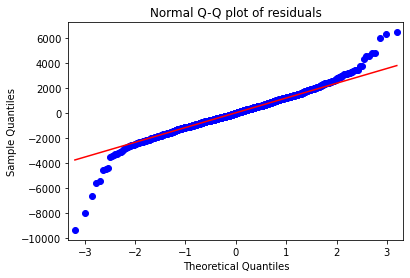

In [61]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model_8.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model_8.resid>6000))  # outliar detection from above QQ plot of residuals

[array([147, 523], dtype=int64)]

In [63]:
list(np.where(model_8.resid<-6000)) 

[array([221, 601, 960], dtype=int64)]

### Solving Outlier Problem :-
### Finding Cook's Distance

In [64]:
model_influence = ols_model.get_influence()

In [65]:
summary_df = model_influence.summary_frame()

In [66]:
summary_df.sort_values('cooks_d', ascending=False)

,dfb_Intercept,dfb_Age,dfb_KM,dfb_HP,dfb_CC,dfb_Doors,dfb_Gears,dfb_QT,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,0.515677,-4.705252e-01,-2.424235e+00,-2.781702,2.728110e+01,0.654770,3.652747e-01,-3.977656e+00,-3.071130e+00,7.952011e+01,7.982911,0.918237,26.752214,8.164500,27.360754
221,2.139174,-1.088602e+00,1.146065e-01,0.564540,6.410386e-01,0.630731,8.519313e-02,1.441506e+00,-3.039079e+00,1.021031e+00,-7.522228,0.139712,-3.031383,-7.673262,-3.092248
960,1.541031,-8.324005e-01,1.577609e-01,0.849805,3.489060e-01,0.685880,2.037714e-03,1.568607e+00,-2.319585e+00,6.049996e-01,-5.402011,0.157248,-2.333452,-5.456195,-2.356857
601,0.692477,-4.722465e-01,3.974417e-01,0.529493,-8.673360e-02,0.419718,-5.483217e-03,6.915010e-01,-1.072724e+00,1.554993e-01,-6.100811,0.036238,-1.183002,-6.179799,-1.198318
109,-0.537798,2.873046e-01,-3.074883e-01,0.017782,-2.025374e-01,-0.183986,-6.269445e-02,9.074505e-02,7.446858e-01,1.249042e-01,4.548708,0.051531,1.060254,4.580442,1.067650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.000022,5.223029e-05,1.016965e-05,0.000083,1.598062e-05,-0.000129,-5.684949e-05,-1.049507e-05,1.498485e-05,4.787348e-09,0.004339,0.002284,0.000208,0.004337,0.000207
1251,0.000007,3.625944e-05,6.488095e-06,0.000045,7.652586e-06,-0.000068,-3.033481e-05,-6.670375e-06,1.231308e-05,1.432782e-09,0.002284,0.002466,0.000114,0.002283,0.000114
482,-0.000002,-4.059363e-07,-1.122498e-07,-0.000018,-2.527187e-08,-0.000034,3.091887e-06,-5.696935e-06,8.137963e-06,3.189477e-10,-0.001328,0.001625,-0.000054,-0.001328,-0.000054
1095,0.000001,5.698073e-07,1.699512e-05,0.000011,2.527991e-08,-0.000013,-6.671838e-06,-5.426641e-06,2.919427e-06,8.462071e-11,0.000405,0.004615,0.000028,0.000405,0.000028


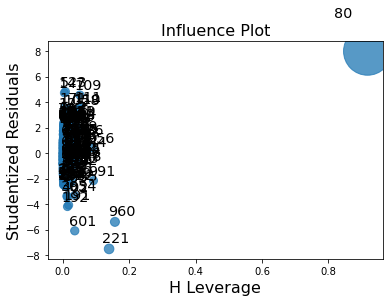

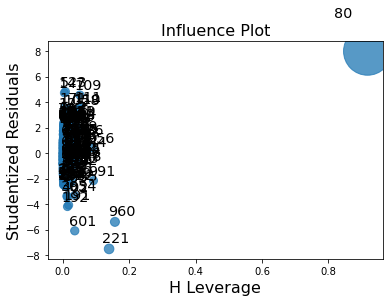

In [67]:
model_influence.plot_influence()

### As we know that index 80 has highest Cook's Distance

### Thus it will be wise to drop that row from the data set


In [68]:
toyota_data[toyota_data.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Improving the model :

In [69]:
toyota = toyota_data.drop(toyota_data.index[[80]],axis=0).reset_index()

In [70]:
toyota

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [71]:
toyota.shape

(1435, 10)

### OLS Final Model :

In [72]:
ols_final_model=smf.ols(formula = 'Price ~ Age + KM + HP + CC + Gears + Weight + QT + Doors', data =toyota).fit()

In [73]:
print('rsquared value for Final Model     : ',round(ols_final_model.rsquared,4))
print('rsquared adj value for Final Model : ',round(ols_final_model.rsquared_adj,4))
print('aic value for Final Model          : ',round(ols_final_model.aic,4))
print('bic value for Final Model          : ',round(ols_final_model.bic,4))

rsquared value for Final Model     :  0.8694
rsquared adj value for Final Model :  0.8686
aic value for Final Model          :  24687.281
bic value for Final Model          :  24734.7013


### Model Evaluation :

In [74]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':14,"KM":60000,"HP":70,"CC":1100,"Gears":6,"Doors":4,"QT":69,"Weight":1080},index=[0])
new_data

,Age,KM,HP,CC,Gears,Doors,QT,Weight
0,14,60000,70,1100,6,4,69,1080


In [75]:
# Manual Prediction of Profit
ols_final_model.predict(new_data)

0    16373.088643
dtype: float64

In [76]:
# Automatic Prediction of Profit
pred_y = ols_final_model.predict(toyota)
pred_y

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1430     8971.183912
1431     8435.722285
1432     8591.588786
1433     8713.828687
1434     9969.788925
Length: 1435, dtype: float64

### Standardization of the variables 

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
ss = StandardScaler()

In [79]:
toyota_scaled = ss.fit_transform(toyota)

In [80]:
toyota_scaled = pd.DataFrame(toyota_scaled,columns = toyota.columns)

In [81]:
toyota_scaled

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,-1.732742,0.766449,-1.774222,-0.575732,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
1,-1.730329,0.835501,-1.774222,0.116580,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
2,-1.727915,0.890743,-1.720407,-0.716457,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
3,-1.725502,1.166951,-1.612776,-0.548681,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
4,-1.723088,0.835501,-1.397514,-0.802119,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.857059
...,...,...,...,...,...,...,...,...,...,...
1430,1.720944,-0.890796,0.701288,-1.281143,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428,-0.901458
1431,1.723357,0.033118,0.862735,-1.322333,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428,-1.091701
1432,1.725771,-0.614589,0.808919,-1.375261,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428,-1.091701
1433,1.728184,-0.959848,0.755104,-1.377929,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428,-1.091701


### Model Building using Sklearn

In [82]:
X = toyota_scaled.drop('Price',axis=1)
y = toyota_scaled[['Price']]

In [83]:
X.head(5)

,index,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,-1.732742,-1.774222,-0.575732,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
1,-1.730329,-1.774222,0.116580,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
2,-1.727915,-1.720407,-0.716457,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
3,-1.725502,-1.612776,-0.548681,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.761938
4,-1.723088,-1.397514,-0.802119,-0.767465,2.314319,-1.084443,-0.140475,2.987959,1.857059


In [84]:
y.head(5)

,Price
0,0.766449
1,0.835501
2,0.890743
3,1.166951
4,0.835501


In [85]:
X.shape,y.shape

((1435, 9), (1435, 1))

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=424242)

In [87]:
X_train.shape,y_train.shape

((1148, 9), (1148, 1))

In [88]:
X_test.shape,y_test.shape

((287, 9), (287, 1))

### Model Training

In [89]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [90]:
print("Intercept value of Model is    : " ,linear_reg.intercept_)
print("Coefficient value of Model is  : " ,linear_reg.coef_)

Intercept value of Model is    :  [-0.00017305]
Coefficient value of Model is  :  [[ 0.12171845 -0.75925325 -0.14287112  0.17799074 -0.13912328  0.00240199
   0.030978    0.13210477  0.26186692]]


### Model Testing || Model Evaluation 

### Training data

In [91]:
y_pred_train = linear_reg.predict(X_train)
y_pred_train

array([[-0.42998759],
       [ 1.51022522],
       [-0.4837785 ],
       ...,
       [-0.82239445],
       [-0.20733427],
       [-0.09075863]])

### Calculation of Error rates of the training model 

In [92]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_train, y_pred_train),2)) 
print('Mean Squared Error     :', round(mean_squared_error(y_train, y_pred_train),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("R^2 Score              :", round(r2_score(y_train, y_pred_train),2))

Mean Absolute Error    : 0.27
Mean Squared Error     : 0.14
Root Mean Squared Error: 0.37
R^2 Score              : 0.87


In [93]:
error= y_train - y_pred_train
error

,Price
1027,0.436866
1,-0.674724
991,-0.006517
732,0.314943
371,-0.408851
...,...
300,0.016296
1252,0.189207
692,0.594496
951,-0.434875


### Test data :

In [94]:
y_pred_test = linear_reg.predict(X_test)
y_pred_test

array([[-6.69691980e-01],
       [-5.89288881e-01],
       [ 1.03990689e+00],
       [-3.92536964e-01],
       [-3.61808392e-01],
       [-5.52932152e-01],
       [ 1.99091480e+00],
       [-1.53029159e-02],
       [ 1.37686385e+00],
       [ 3.17078619e-01],
       [-9.64359532e-01],
       [ 4.55517997e-01],
       [-6.59221157e-01],
       [-1.09079673e+00],
       [-6.46035893e-01],
       [-1.81209230e-01],
       [-1.02621970e+00],
       [-3.50754564e-01],
       [-6.84075468e-01],
       [-5.34283571e-01],
       [-9.69332210e-01],
       [ 1.56811122e-01],
       [-7.53033109e-01],
       [-9.73548971e-02],
       [ 8.37739286e-01],
       [-1.04807944e+00],
       [ 1.29992924e+00],
       [ 5.47091646e-01],
       [ 4.30252835e-01],
       [-6.23818137e-01],
       [ 1.07818067e+00],
       [-1.08593563e+00],
       [-7.98994532e-01],
       [ 1.69800155e+00],
       [-2.71822993e-01],
       [-1.23165903e+00],
       [-1.61237424e-01],
       [-3.54823554e-02],
       [ 7.8

### Calculation of the Error rate of the testing model :

In [95]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error     :', round(mean_squared_error(y_test, y_pred_test),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
print("R^2 Score              :", round(r2_score(y_test, y_pred_test),2))

Mean Absolute Error    : 0.24
Mean Squared Error     : 0.1
Root Mean Squared Error: 0.32
R^2 Score              : 0.88


In [96]:
error= y_test - y_pred_test
error

,Price
1421,-0.193484
1282,0.098994
65,0.679459
747,-0.097758
697,0.230583
...,...
1418,-0.069180
1265,-0.608562
1356,-0.081771
432,-0.050777


### Log Tranformation 
-----------------------------------
### Using Statsmodels for Model building

In [97]:
toyota_copy = toyota.copy()
toyota_copy

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [103]:
toyota_copy['log_Age']    = np.log(toyota_copy['Age'])
toyota_copy['log_KM']     = np.log(toyota_copy['KM'])
toyota_copy['log_HP']     = np.log(toyota_copy['HP'])
toyota_copy['log_CC']     = np.log(toyota_copy['CC'])
toyota_copy['log_Doors']  = np.log(toyota_copy['Doors'])
toyota_copy['log_Gears']  = np.log(toyota_copy['Gears'])
toyota_copy['log_QT']     = np.log(toyota_copy['QT'])
toyota_copy['log_Weight'] = np.log(toyota_copy['Weight'])

toyota_copy

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,...,log_QT,log_Weight,sqrt_Age,sqrt_KM,sqrt_HP,sqrt_CC,sqrt_Doors,sqrt_Gears,sqrt_QT,sqrt_Weight
0,0,13500,23,46986,90,2000,3,5,210,1165,...,5.347108,7.060476,4.795832,216.762543,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
1,1,13750,23,72937,90,2000,3,5,210,1165,...,5.347108,7.060476,4.795832,270.068510,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
2,2,13950,24,41711,90,2000,3,5,210,1165,...,5.347108,7.060476,4.898979,204.232710,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
3,3,14950,26,48000,90,2000,3,5,210,1165,...,5.347108,7.060476,5.099020,219.089023,9.486833,44.721360,1.732051,2.236068,14.491377,34.132096
4,4,13750,30,38500,90,2000,3,5,210,1170,...,5.347108,7.064759,5.477226,196.214169,9.486833,44.721360,1.732051,2.236068,14.491377,34.205263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025,...,4.234107,6.932448,8.306624,143.331783,9.273618,36.055513,1.732051,2.236068,8.306624,32.015621
1431,1432,10845,72,19000,86,1300,3,5,69,1015,...,4.234107,6.922644,8.485281,137.840488,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1432,1433,8500,71,17016,86,1300,3,5,69,1015,...,4.234107,6.922644,8.426150,130.445391,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065
1433,1434,7250,70,16916,86,1300,3,5,69,1015,...,4.234107,6.922644,8.366600,130.061524,9.273618,36.055513,1.732051,2.236068,8.306624,31.859065


In [113]:
log_model_1 = smf.ols(formula = 'Price ~ sqrt_Age', data = toyota_copy).fit()

In [105]:
log_model_2 = smf.ols(formula = 'Price ~ log_Age + log_KM ', data =toyota_copy).fit()

In [106]:
log_model_3 = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP', data =toyota_copy).fit()

In [107]:
log_model_4 = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP + log_CC', data =toyota_copy).fit()

In [108]:
log_model_5 = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP + log_CC + log_Doors', data =toyota_copy).fit()

In [109]:
log_model_6 = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP + log_CC + log_Doors + log_Gears', data =toyota_copy).fit()

In [110]:
log_model_7 = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP + log_CC + log_Doors + log_Gears + log_QT', data =toyota_copy).fit()

In [122]:
log_model_8  = smf.ols(formula = 'Price ~ log_Age + log_KM + log_HP + log_CC + log_Doors + log_Gears + log_QT + log_Weight ', data =toyota_copy).fit()

### Log Model 1 Performance

In [114]:
print('R2 Score    : ',round(log_model_1.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_1.rsquared_adj,4))
print('AIC Value   : ',round(log_model_1.aic,4))
print('BIC Value   : ',round(log_model_1.bic,4))

R2 Score    :  0.8028
Adj.R2 Score:  0.8027
AIC Value   :  25264.2442
BIC Value   :  25274.7821


### Log Model 2 Performance 

In [115]:
print('R2 Score    : ',round(log_model_2.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_2.rsquared_adj,4))
print('AIC Value   : ',round(log_model_2.aic,4))
print('BIC Value   : ',round(log_model_2.bic,4))

R2 Score    :  0.7702
Adj.R2 Score:  0.7699
AIC Value   :  25485.9745
BIC Value   :  25501.7813


### Log Model 3 Performance

In [116]:
print('R2 Score    : ',round(log_model_3.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_3.rsquared_adj,4))
print('AIC Value   : ',round(log_model_3.aic,4))
print('BIC Value   : ',round(log_model_3.bic,4))

R2 Score    :  0.8022
Adj.R2 Score:  0.8017
AIC Value   :  25273.0635
BIC Value   :  25294.1392


### Log Model 4 Performance

In [117]:
print('R2 Score    : ',round(log_model_4.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_4.rsquared_adj,4))
print('AIC Value   : ',round(log_model_4.aic,4))
print('BIC Value   : ',round(log_model_4.bic,4))

R2 Score    :  0.8036
Adj.R2 Score:  0.803
AIC Value   :  25264.6136
BIC Value   :  25290.9582


### Log Model 5 Performance

In [118]:
print('R2 Score    : ',round(log_model_5.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_5.rsquared_adj,4))
print('AIC Value   : ',round(log_model_5.aic,4))
print('BIC Value   : ',round(log_model_5.bic,4))

R2 Score    :  0.8042
Adj.R2 Score:  0.8035
AIC Value   :  25261.9672
BIC Value   :  25293.5807


### Log Model 6 Performance

In [119]:
print('R2 Score    : ',round(log_model_6.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_6.rsquared_adj,4))
print('AIC Value   : ',round(log_model_6.aic,4))
print('BIC Value   : ',round(log_model_6.bic,4))

R2 Score    :  0.8059
Adj.R2 Score:  0.8051
AIC Value   :  25251.5042
BIC Value   :  25288.3866


### Log Model 7 Performance

In [120]:
print('R2 Score    : ',round(log_model_7.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_7.rsquared_adj,4))
print('AIC Value   : ',round(log_model_7.aic,4))
print('BIC Value   : ',round(log_model_7.bic,4))

R2 Score    :  0.8146
Adj.R2 Score:  0.8137
AIC Value   :  25187.9003
BIC Value   :  25230.0517


### Log Model 8 Performance

In [123]:
print('R2 Score    : ',round(log_model_8.rsquared,4)) 
print('Adj.R2 Score: ',round(log_model_8.rsquared_adj,4))
print('AIC Value   : ',round(log_model_8.aic,4))
print('BIC Value   : ',round(log_model_8.bic,4))

R2 Score    :  0.8414
Adj.R2 Score:  0.8405
AIC Value   :  24965.4439
BIC Value   :  25012.8642


--------------------------------------------------
### Using Sklearn library for Model Building 

In [126]:
toyota_copy['log_Age']    = np.log(toyota_copy['Age'])
toyota_copy['log_KM']     = np.log(toyota_copy['KM'])
toyota_copy['log_HP']     = np.log(toyota_copy['HP'])
toyota_copy['log_CC']     = np.log(toyota_copy['CC'])
toyota_copy['log_Doors']  = np.log(toyota_copy['Doors'])
toyota_copy['log_Gears']  = np.log(toyota_copy['Gears'])
toyota_copy['log_QT']     = np.log(toyota_copy['QT'])
toyota_copy['log_Weight'] = np.log(toyota_copy['Weight'])


toyota_copy

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,log_Age,log_KM,log_HP,log_CC,log_Doors,log_Gears,log_QT,log_Weight
0,0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
1,1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
2,2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
3,3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
4,4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1431,1432,10845,72,19000,86,1300,3,5,69,1015,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1432,1433,8500,71,17016,86,1300,3,5,69,1015,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1433,1434,7250,70,16916,86,1300,3,5,69,1015,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


In [127]:
X = toyota_copy.iloc[:,10:18]
y = toyota_copy[['Price']]

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12121)

In [131]:
X_train.shape , y_train.shape

((1148, 8), (1148, 1))

In [132]:
X_test.shape, y_test.shape

((287, 8), (287, 1))

### Model training 

In [134]:
log_lr_model = LinearRegression()

In [135]:
log_lr_model.fit(X_train,y_train)

LinearRegression()

### Model Testing and Model Evaluation for training data :

In [136]:
y_predicted_train = log_lr_model.predict(X_train)

In [137]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_train, y_predicted_train),2)) 
print('Mean Squared Error     :', round(mean_squared_error(y_train, y_predicted_train),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_train, y_predicted_train)),2))
print("R^2 Score              :", round(r2_score(y_train, y_predicted_train),2))

Mean Absolute Error    : 1045.48
Mean Squared Error     : 2110583.69
Root Mean Squared Error: 1452.78
R^2 Score              : 0.82


In [138]:
error = y_train - y_predicted_train
error

,Price
843,-652.548692
868,987.908601
548,2014.950982
52,3839.972482
498,25.584325
...,...
1295,-542.215499
1165,-786.969339
1366,521.372254
158,847.176159


### Model Testing and Model Evaluation for testing data :

In [139]:
y_predicted_test = log_lr_model.predict(X_test)

In [140]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_test, y_predicted_test),2))
print('Mean Squared Error     :', round(mean_squared_error(y_test, y_predicted_test),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_predicted_test)),2))
print("R^2 Score              :", round(r2_score(y_test, y_predicted_test),2))

Mean Absolute Error    : 1074.8
Mean Squared Error     : 2022193.0
Root Mean Squared Error: 1422.04
R^2 Score              : 0.88


In [141]:
error = y_test - y_predicted_test
error

,Price
1353,1193.395007
314,1777.866604
1260,1989.394913
952,926.318094
162,1511.556558
...,...
455,979.423742
1234,-937.630159
915,-548.843645
88,2681.361333


### Homoscedasticity Test :

In [144]:
## All input features vs the error = Homoscedasticity Test ##
## SCATTER PLOT ##

In [145]:
from sklearn.preprocessing import StandardScaler
std_s = StandardScaler()
std_s = std_s.fit_transform(X)
std_s

array([[ -1.55892269,  -0.13784916,  -0.73809292, ...,  -0.12401564,
          2.1762182 ,   1.82172013],
       [ -1.55892269,   0.27306278,  -0.73809292, ...,  -0.12401564,
          2.1762182 ,   1.82172013],
       [ -1.47570262,  -0.2491255 ,  -0.73809292, ...,  -0.12401564,
          2.1762182 ,   1.82172013],
       ...,
       [  0.6451496 ,  -1.08694501,  -1.04484201, ...,  -0.12401564,
         -0.30723282,  -1.16960145],
       [  0.6174133 ,  -1.09245268,  -1.04484201, ...,  -0.12401564,
         -0.30723282,  -1.16960145],
       [  0.77821974, -10.19007167,   0.61589605, ...,  -0.12401564,
         -3.18488168,   0.85022661]])

In [146]:
X_scaled = pd.DataFrame(std_s,columns=X.columns)
X_scaled

,log_Age,log_KM,log_HP,log_CC,log_Doors,log_Gears,log_QT,log_Weight
0,-1.558923,-0.137849,-0.738093,2.140041,-1.093679,-0.124016,2.176218,1.821720
1,-1.558923,0.273063,-0.738093,2.140041,-1.093679,-0.124016,2.176218,1.821720
2,-1.475703,-0.249125,-0.738093,2.140041,-1.093679,-0.124016,2.176218,1.821720
3,-1.319189,-0.117898,-0.738093,2.140041,-1.093679,-0.124016,2.176218,1.821720
4,-1.039373,-0.323980,-0.738093,2.140041,-1.093679,-0.124016,2.176218,1.914665
...,...,...,...,...,...,...,...,...
1430,0.589278,-0.910885,-1.044842,-1.531989,-1.093679,-0.124016,-0.307233,-0.956829
1431,0.672498,-0.983892,-1.044842,-1.531989,-1.093679,-0.124016,-0.307233,-1.169601
1432,0.645150,-1.086945,-1.044842,-1.531989,-1.093679,-0.124016,-0.307233,-1.169601
1433,0.617413,-1.092453,-1.044842,-1.531989,-1.093679,-0.124016,-0.307233,-1.169601


In [147]:
from sklearn.linear_model import LinearRegression
test_model = LinearRegression() 
test_model.fit(X,y)

LinearRegression()

In [148]:
test_model.coef_

array([[-5302.26393773,   162.29760931,  5176.7033773 , -5194.76669222,
         -323.63637372,  2884.62685896,   669.87655328, 22174.57356541]])

In [149]:
test_model.intercept_ 

array([-117716.37923651])

In [150]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() 
linear_model.fit(X_scaled,y)

LinearRegression()

In [151]:
test_model.coef_

array([[-5302.26393773,   162.29760931,  5176.7033773 , -5194.76669222,
         -323.63637372,  2884.62685896,   669.87655328, 22174.57356541]])

In [152]:
test_model.intercept_ 

array([-117716.37923651])

In [153]:
y_predicted = test_model.predict(X_scaled)
y_predicted

array([[ -82560.95501146],
       [ -82494.2649855 ],
       [ -83020.26965857],
       ...,
       [-144909.06080744],
       [-144762.88950064],
       [-105506.16550622]])

### 7. Model Evaluation

In [154]:
error = y - y_predicted
error

,Price
0,96060.955011
1,96244.264985
2,96970.269659
3,98778.848275
4,97034.940814
...,...
1430,147366.107622
1431,155882.343744
1432,153409.060807
1433,152012.889501


In [155]:
## All input features vs the error = Homoscedasticity Test  ##
## SCATTER PLOT ##

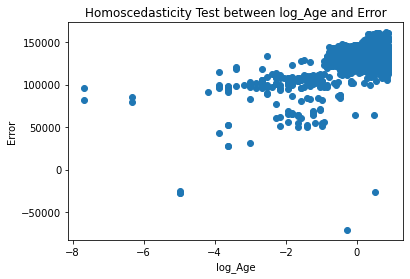

In [157]:
plt.scatter(x = X_scaled['log_Age']  , y = error)
plt.xlabel('log_Age')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_Age and Error')
plt.show()

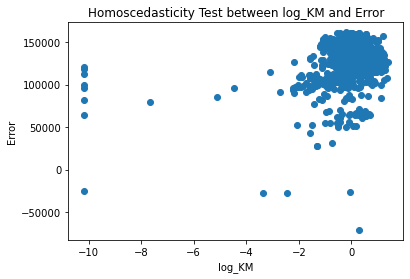

In [158]:
plt.scatter(x = X_scaled['log_KM']  , y = error)
plt.xlabel('log_KM')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_KM and Error')
plt.show()

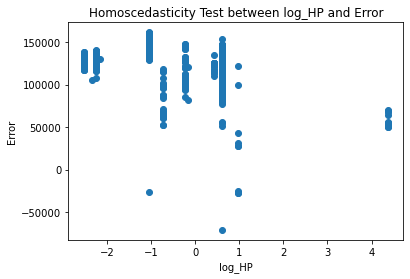

In [159]:
plt.scatter(x = X_scaled['log_HP']  , y = error)
plt.xlabel('log_HP')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_HP and Error') 
plt.show()

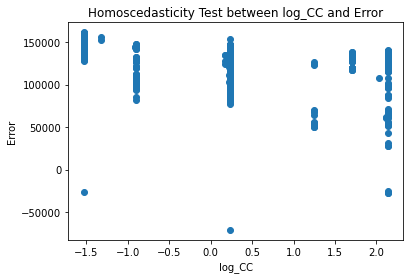

In [160]:
plt.scatter(x = X_scaled['log_CC']  , y = error)
plt.xlabel('log_CC')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_CC and Error')
plt.show()

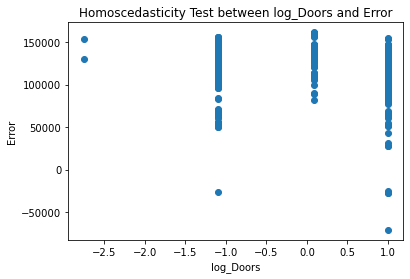

In [161]:
plt.scatter(x = X_scaled['log_Doors']  , y = error)
plt.xlabel('log_Doors')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_Doors and Error')
plt.show()

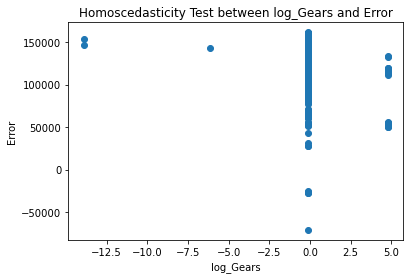

In [162]:
plt.scatter(x = X_scaled['log_Gears']  , y = error)
plt.xlabel('log_Gears')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_Gears and Error')
plt.show()

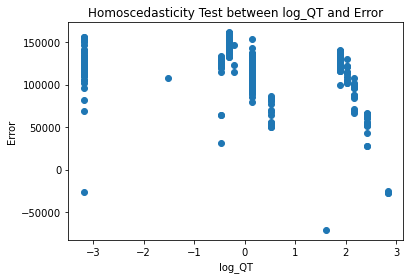

In [163]:
plt.scatter(x = X_scaled['log_QT']  , y = error)
plt.xlabel('log_QT')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_QT and Error')
plt.show()

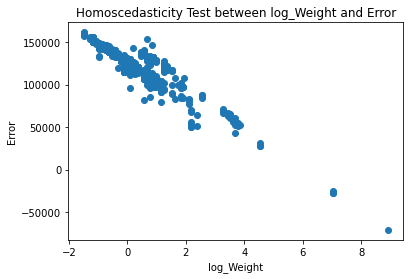

In [164]:
plt.scatter(x = X_scaled['log_Weight']  , y = error)
plt.xlabel('log_Weight')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between log_Weight and Error')
plt.show()

### Zero Residual Mean Test :

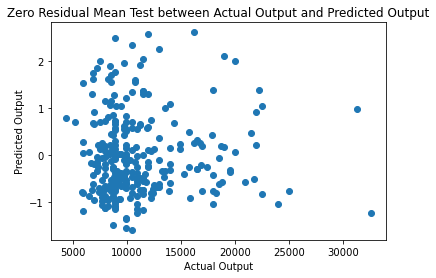

In [165]:
#This test is always between actual output and the predicted output :
plt.scatter(x = y_test , y = y_pred_test)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean Test between Actual Output and Predicted Output')
plt.show()